<a href="https://colab.research.google.com/github/AlfredoAragon1109/An-lisis-de-Salarios-INEC-2025/blob/main/Analisis_Salarios_CR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **¿Quiénes ganan más en Costa Rica?**  
***Análisis de salarios 💵, educación 🎓 y brechas de género ⚖️ (I Trimestre 2025) 💼***

*Resultados clave de la Encuesta Continua de Empleo INEC 2025 - 2026*

👤 ***Alfredo Aragón***



## 📝 Descripción del Proyecto

Este proyecto tiene como objetivo analizar los ingresos salariales en Costa Rica utilizando los datos de la Encuesta Continua de Empleo (ECE), I Trimestre 2025, con un enfoque en dos ejes clave:

1. Identificar las ocupaciones e industrias mejor remuneradas del país, clasificando los ingresos según la posición en el empleo y el sector económico, de acuerdo con la Clasificación de Ocupaciones de Costa Rica (COCR-2011) y las categorías de rama de actividad económica.

2. Explorar la relación entre nivel educativo y salario, con el fin de evaluar si a mayor formación académica corresponde un mayor ingreso. Se busca detectar patrones salariales por grado educativo y posibles brechas entre hombres y mujeres, lo cual permite analizar la existencia del llamado “techo de cristal”: una barrera invisible que puede limitar el crecimiento salarial de las mujeres, incluso con altos niveles educativos.



## 📚 Fuente de Datos

Los datos utilizados en este proyecto provienen de la Encuesta Continua de Empleo (ECE), elaborada por el Instituto Nacional de Estadística y Censos (INEC) de Costa Rica. Esta encuesta es una investigación estadística realizada de forma trimestral mediante entrevistas en hogares a nivel nacional, con el objetivo de medir de manera continua los principales indicadores del mercado laboral costarricense.

La ECE emplea una muestra probabilística, bietápica y estratificada que permite obtener resultados representativos de la población. Se enfoca en personas de 15 años o más, residentes habituales de las viviendas seleccionadas. La recolección de datos se realiza utilizando dispositivos móviles (tablets), lo que garantiza mayor agilidad y precisión en la captura de información.

Para este análisis se utiliza la base de datos correspondiente al I Trimestre del 2025, la cual incluye variables sobre:

* Nivel educativo alcanzado

* Ingresos laborales

* Sexo

* Ocupación

* Rama de actividad económica

Condición de empleo (formal/informal)

El uso de esta fuente confiable y estandarizada permite desarrollar un análisis robusto sobre las brechas salariales y la identificación de sectores con mayores ingresos en Costa Rica.

Datos dispobibles en:
 https://sistemas.inec.cr/nada5.4/index.php/catalog/369/study-description

### 📥 Carga de Datos
Los datos de la Encuesta Continua de Empleo (ECE) están disponibles en la página oficial del Instituto Nacional de Estadística y Censos (INEC) de Costa Rica, usualmente en formato SAV (formato utilizado por SPSS). Este formato es común en encuestas y estudios estadísticos, ya que conserva tanto los datos como la información de metadatos, etiquetas y variables.

Para cargar estos archivos en Python, se utiliza la librería pyreadstat, que permite leer archivos SAV directamente y convertirlos en un DataFrame de pandas para facilitar su manipulación y análisis.

A continuación, se muestra un ejemplo de código para importar el archivo correspondiente al I Trimestre 2025:

In [ ]:
import pandas as pd
import pyreadstat

# Leer el archivo .sav
df, meta = pyreadstat.read_sav("/content/I Trimestre 2025.sav")


### 📊 Características de la base de datos

In [ ]:
# Número total de filas (observaciones)
num_observaciones = df.shape[0]

print(f"Cantidad total de observaciones (encuestados): {num_observaciones}")
# Número total de columnas (variables)
num_variables = df.shape[1]

print(f"Cantidad total de variables: {num_variables}")


Cantidad total de observaciones (encuestados): 21962
Cantidad total de variables: 332


### 📋 Variables disponibles

La base de datos contiene un total de 332 variables, las cuales representan distintos aspectos de la encuesta, tales como características sociodemográficas, condiciones laborales, ingresos, educación, entre otros. A continuación se muestra un listado ordenado y organizado de estas variables para facilitar su consulta y análisis.

In [ ]:
# @title
columnas = df.columns.tolist()
num_columnas = 4  # número de columnas horizontales para mostrar

# Calcular cuántas filas por columna
filas = (len(columnas) + num_columnas - 1) // num_columnas

# Imprimir en columnas
for i in range(filas):
    fila_items = []
    for j in range(num_columnas):
        idx = i + j * filas
        if idx < len(columnas):
            fila_items.append(f"{columnas[idx]:<30}")
    print("   ".join(fila_items))


ID_AMO                           D24A                             I1B                              Sector_institucional_secundario
ID_TRIMESTRE                     D25A                             I2                               Rama_actividad_secundario     
ID_VIVIENDA                      D26A                             I3                               Disponibilidad_fuera_fuerza_trab
ID_HOGAR                         D27                              I5                               Razon_desempleado_con_experienc
ID_LINEA                         E1                               I5A                              Tiempo_busqueda_empleo        
Sexo                             E2                               I6                               Posicion_desempleo            
Edad                             E3                               I6A                              Sector_institucional_desempleo
Estado_conyugal                  E3A                              I7                  

## 🧮 Variables de Interes

### 💼 Poblacion Encuestada con Trabajo

Del total de 21,962 personas entrevistadas, aproximadamente el 46.3% reportó haber trabajado la semana pasada. Esto significa que menos de la mitad de la población de 15 años o más estuvo activa laboralmente durante el periodo de referencia.

Este dato es fundamental para comprender la dinámica del mercado laboral en Costa Rica, ya que evidencia una proporción considerable de la población sin empleo activo, lo cual puede influir directamente en los análisis posteriores relacionados con ingresos, ocupaciones y brechas salariales.


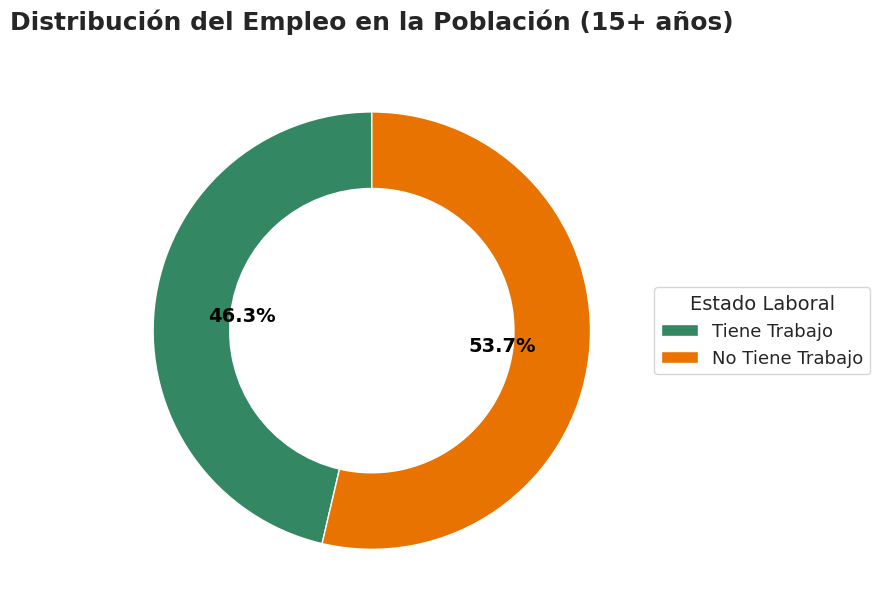

In [ ]:
import matplotlib.pyplot as plt

# Datos
labels = ['Tiene Trabajo', 'No Tiene Trabajo']
sizes = [trabajo_counts.get(1, 0), trabajo_counts.get(2, 0)]
colors = ['#338763', '#E87300']  # Tonos profesionales: azul y naranja

# Crear gráfico de dona con estilo profesional
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,  # No etiquetas directas, las ponemos en leyenda
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.35, edgecolor='white'),
    textprops=dict(color="white", fontsize=14, weight='bold')
)

# Añadir título con fuente profesional y centrado
plt.title('Distribución del Empleo en la Población (15+ años)', fontsize=18, weight='bold', pad=20)

# Leyenda a la derecha del gráfico
ax.legend(
    wedges, labels,
    title="Estado Laboral",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=13,
    title_fontsize=14
)

# Mejorar aspecto de texto % en el gráfico
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')
    autotext.set_fontsize(14)

plt.tight_layout()
plt.show()



### 💵Salario Neto

Los datos muestran que el salario neto promedio de las personas que reportaron estar trabajando es de aproximadamente ₡448,352. La mediana y la moda coinciden en ₡360,000, lo que indica que la mitad de los trabajadores gana menos de ₡360,000 y que este valor es el más frecuente dentro de la muestra.

La desviación estándar es alta (₡284,084), lo que refleja una considerable variabilidad en los ingresos entre los trabajadores, desde salarios mínimos de ₡100,000 hasta máximos que alcanzan ₡4,000,000. Esta dispersión sugiere la presencia de grupos con ingresos muy distintos, probablemente asociados a diferentes sectores, niveles de experiencia o tipos de ocupación.

En conjunto, estos resultados permiten entender que aunque existe un salario típico (₡360,000), hay una amplia heterogeneidad en los ingresos, lo cual es un aspecto relevante para futuros análisis sobre desigualdad salarial o políticas de empleo.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

# Filtrar datos para quienes tienen trabajo y salario neto >= 100,000
df_trabajan = df[(df['Trabajo'] == 1) & (df['Salario_neto'] >= 100000)]

# Calcular estadísticos
media = df_trabajan['Salario_neto'].mean()
mediana = df_trabajan['Salario_neto'].median()
moda_result = stats.mode(df_trabajan['Salario_neto'], keepdims=True)
moda = moda_result.mode[0]
std_dev = df_trabajan['Salario_neto'].std()
minimo = df_trabajan['Salario_neto'].min()
maximo = df_trabajan['Salario_neto'].max()

# Crear DataFrame con estadísticos
estadisticas = pd.DataFrame({
    'Estadístico': ['Media', 'Mediana', 'Moda', 'Desviación Estándar', 'Mínimo', 'Máximo'],
    'Valor': [media, mediana, moda, std_dev, minimo, maximo]
})

# Función para formatear números como ₡ con separadores de miles y sin notación científica
def format_colones(x):
    return f"₡{int(x):,}".replace(',', '.')

estadisticas['Valor'] = estadisticas['Valor'].apply(format_colones)

# Mostrar tabla de estadísticas
print(estadisticas.to_string(index=False))



        Estadístico      Valor
              Media   ₡448.352
            Mediana   ₡360.000
               Moda   ₡360.000
Desviación Estándar   ₡284.084
             Mínimo   ₡100.000
             Máximo ₡4.000.000


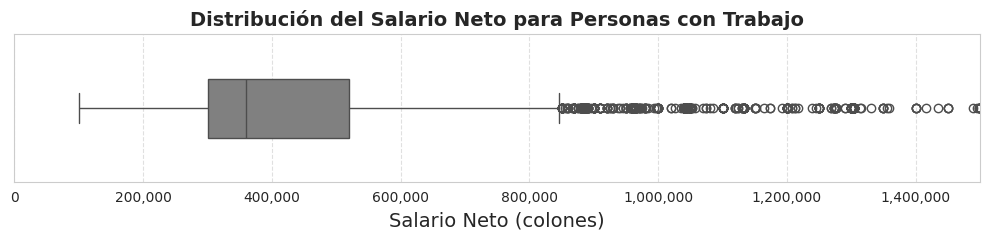

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

plt.figure(figsize=(10, 2.5))  # Reducir altura para hacerlo más delgado

sns.boxplot(
    x=df_trabajan['Salario_neto'],
    color='gray',
    orient='h',
    width=0.4  # Hace la caja más delgada
)

plt.title('Distribución del Salario Neto para Personas con Trabajo', fontsize=14, weight='bold')
plt.xlabel('Salario Neto (colones)', fontsize=14)
plt.yticks([])  # Ocultar ticks eje y
plt.xlim(0, 1500000)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Formato con separador de miles
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()


### 🎓 Nivel Académico y su Incidencia en el Salario Neto 💰

<ipython-input-97-118d0f7eb815>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Nivel_educativo_nombre", y="Ingreso_asalariado", data=df_filtrado, palette="viridis")


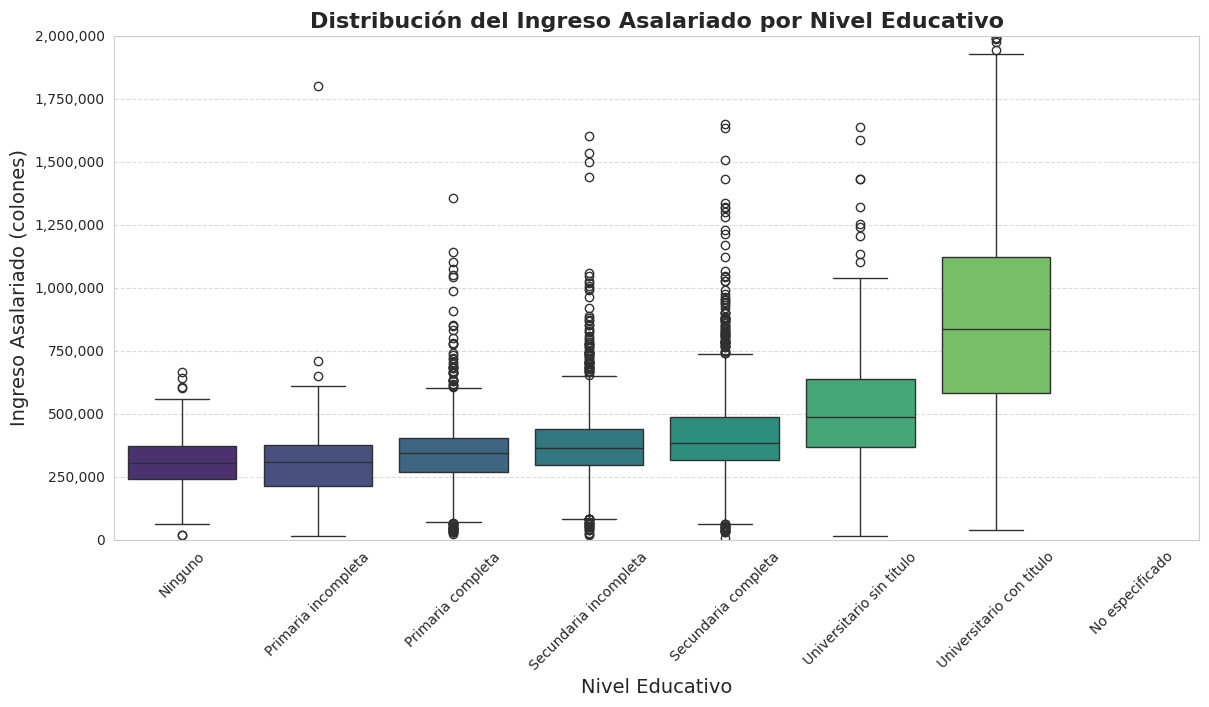

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Diccionario para mapear códigos a nombres
nivel_educativo_map = {
    0: "Ninguno",
    1: "Primaria incompleta",
    2: "Primaria completa",
    3: "Secundaria incompleta",
    4: "Secundaria completa",
    5: "Universitario sin título",
    6: "Universitario con título",
    9: "No especificado"
}

# Definir el orden deseado de las categorías
orden_categorias = [
    "Ninguno",
    "Primaria incompleta",
    "Primaria completa",
    "Secundaria incompleta",
    "Secundaria completa",
    "Universitario sin título",
    "Universitario con título",
    "No especificado"
]

# Crear nueva columna con nombres legibles y tipo categoría ordenada
df['Nivel_educativo_nombre'] = df['Nivel_educativo'].map(nivel_educativo_map)
df['Nivel_educativo_nombre'] = pd.Categorical(df['Nivel_educativo_nombre'], categories=orden_categorias, ordered=True)

# Filtrar datos válidos
df_filtrado = df[(df["Ingreso_asalariado"] > 0) & (df["Nivel_educativo_nombre"].notna())]

plt.figure(figsize=(14, 8))

# Graficar boxplot con orden respetado
sns.boxplot(x="Nivel_educativo_nombre", y="Ingreso_asalariado", data=df_filtrado, palette="viridis")

plt.xticks(rotation=45)
plt.title("Distribución del Ingreso Asalariado por Nivel Educativo", fontsize=16, weight='bold')
plt.xlabel("Nivel Educativo", fontsize=14)
plt.ylabel("Ingreso Asalariado (colones)", fontsize=14)

plt.ylim(0, 2_000_000)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Ajustar espacio para la leyenda
plt.subplots_adjust(bottom=0.25)

plt.show()


## 👨‍💼Ocupaciones e Industrias Mejor Remuneradas en Costa Rica

### 🔝 Top 10 Actividades Económicas por Mediana del Ingreso Asalariado

El siguiente cuadro presenta el top 10 de ramas de actividad económica (código CAECR-2011) con mayores ingresos asalariados según su mediana mensual, entre las personas ocupadas de 15 años o más.

Esta información se enmarca dentro del grupo de variables C. Personas ocupadas, las cuales consideran como ocupadas a aquellas personas que, durante la semana de referencia, participaron al menos una hora en la producción de bienes y servicios económicos. También se incluyen personas con empleo que no trabajaron temporalmente por razones como incapacidad, huelgas o falta de insumos, siempre que dicho periodo no supere un mes.

El ranking evidencia que las actividades con mayor ingreso mediano tienden a estar asociadas a sectores de alta especialización o valor agregado. Por ejemplo:

* Códigos 6612.0 y 7320.0, que ocupan los primeros lugares, corresponden a actividades de gestión de fondos y asesoramiento financiero y servicios de consultoría empresarial, respectivamente. Estos sectores usualmente requieren alta calificación profesional y están estrechamente vinculados con la economía del conocimiento.

* El código 6430.0, también en el top, está relacionado con sociedades de inversión y fondos, otro nicho financiero con alta rentabilidad y poca representación poblacional.

* Algunos códigos como 128.0 y 2620.0 (actividades específicas dentro del sector industrial) también muestran ingresos altos, lo que podría estar relacionado con puestos técnicos o especializados en producción, probablemente en industrias con alto nivel de exportación o automatización.

* El código 3030.0 sugiere fabricación de componentes electrónicos u ópticos, una industria altamente tecnificada, y 4651.0, correspondiente a venta de equipo electrónico, también refleja ingresos elevados.

* Otros como 6499.0 y 6621.0 completan la lista con servicios financieros o relacionados a seguros, inversión y actividades auxiliares al sistema financiero.

En resumen, el análisis refleja que los sectores financiero, tecnológico e industrial especializado concentran los ingresos medianos más altos. Esto no solo evidencia una mayor remuneración en estas ramas, sino también posibles desigualdades estructurales entre sectores económicos con alta especialización y aquellos que requieren menor nivel educativo o formación técnica.

In [ ]:
import pandas as pd

# Filtrar datos válidos
df_filtrado = df[df["Ingreso_asalariado"] > 0]

# Calcular la mediana del ingreso por Cod_rama
medianas_rama = df_filtrado.groupby("Cod_rama")["Ingreso_asalariado"].median().reset_index()

# Ordenar de mayor a menor y mostrar el top 10
top_10_cod_rama = medianas_rama.sort_values(by="Ingreso_asalariado", ascending=False).head(10)

# Diccionario con la descripción de las actividades económicas (CAECR-2011)
descripcion_cod_rama = {
    6612.0: "Actividades de sociedades de cartera",
    7320.0: "Estudios de mercado y encuestas de opinión pública",
    6430.0: "Fideicomisos, fondos y entidades financieras similares",
    128.0:  "Cultivo de especias, plantas aromáticas y medicinales",
    2620.0: "Fabricación de computadoras y equipo periférico",
    3030.0: "Fabricación de aeronaves y naves espaciales",
    4651.0: "Comercio mayorista de equipo informático",
    6499.0: "Otros servicios financieros n.c.p.",
    6202.0: "Consultoría informática y gestión tecnológica",
    6621.0: "Evaluación de riesgos y daños"
}

# Mapear las descripciones al DataFrame
top_10_cod_rama["Descripción Actividad"] = top_10_cod_rama["Cod_rama"].map(descripcion_cod_rama)

# Renombrar columnas para presentación
top_10_cod_rama = top_10_cod_rama.rename(columns={
    "Cod_rama": "Código CAECR",
    "Ingreso_asalariado": "Mediana Ingreso Asalariado (₡)"
})

# Aplicar formato de miles para los ingresos
top_10_cod_rama["Mediana Ingreso Asalariado (₡)"] = top_10_cod_rama["Mediana Ingreso Asalariado (₡)"].apply(lambda x: f"₡{x:,.0f}")

# Reorganizar columnas
top_10_cod_rama = top_10_cod_rama[["Código CAECR", "Descripción Actividad", "Mediana Ingreso Asalariado (₡)"]]

# Mostrar el resultado
print(top_10_cod_rama.to_string(index=False))


 Código CAECR                                  Descripción Actividad Mediana Ingreso Asalariado (₡)
       6612.0                   Actividades de sociedades de cartera                     ₡1,628,990
       7320.0     Estudios de mercado y encuestas de opinión pública                     ₡1,500,000
       6430.0 Fideicomisos, fondos y entidades financieras similares                     ₡1,350,000
        128.0  Cultivo de especias, plantas aromáticas y medicinales                     ₡1,208,750
       2620.0        Fabricación de computadoras y equipo periférico                     ₡1,205,000
       3030.0            Fabricación de aeronaves y naves espaciales                     ₡1,100,000
       4651.0               Comercio mayorista de equipo informático                     ₡1,065,833
       6499.0                     Otros servicios financieros n.c.p.                     ₡1,060,000
       6202.0          Consultoría informática y gestión tecnológica                       ₡965,833


### 🔝 Top 10 de ocupaciones según ingreso mediano (Cod_ocupacion):
Los datos muestran que las ocupaciones con los ingresos medianos más altos están claramente vinculadas a roles de alta responsabilidad, especialización y formación académica avanzada, lo cual es esperado en contextos profesionales y económicos.

* Jueces (₡4,066,667):
Encabezan la lista con un ingreso mediano considerablemente alto. Esto refleja la importancia y la especialización del rol judicial, que requiere estudios extensos en derecho y experiencia considerable.

* Médicos especialistas (₡2,272,154):
Siguen en segundo lugar, con ingresos que reflejan la alta demanda y la especialización requerida en el área médica, un sector que usualmente se encuentra bien remunerado debido a su impacto en la salud pública y la complejidad de su trabajo.

* Directores generales y gerentes generales (₡2,116,667) y Directores y gerentes de producción y operaciones (₡1,928,489):
Estos cargos reflejan posiciones de alta gerencia con responsabilidad sobre la estrategia y operación de empresas o áreas clave, lo que explica sus altos ingresos.

* Directores financieros (₡1,850,617):
Representan un rol crítico en la gestión económica y financiera de las organizaciones, lo que se traduce en un salario competitivo.

* Ingenieros electrónicos (₡1,773,906) y Desarrolladores de software (₡1,752,461):
Estos profesionales técnicos, ligados a la ingeniería y tecnología, muestran ingresos medianos altos, destacando la valorización creciente de las áreas STEM en el mercado laboral actual.

* Biólogos, botánicos, zoólogos y afines (₡1,685,417):
Aunque menos común en la mayoría de los análisis de ingresos, esta ocupación también refleja una remuneración importante, probablemente asociada a roles especializados en investigación o en sectores públicos y privados con énfasis ambiental o científico.

* Gerentes de políticas y planificación (₡1,552,798) y Especialistas en políticas de administración (₡1,548,083):
Estos cargos indican puestos en planificación estratégica y administración pública o privada, con ingresos acordes a la responsabilidad de influir en políticas y procesos organizacionales.

Los ingresos medianos evidencian la correlación directa entre especialización, nivel de responsabilidad y remuneración. Ocupaciones en el sector judicial, salud, alta gerencia y tecnología lideran con ingresos más altos, reflejando la estructura salarial de profesiones que requieren formación avanzada, experiencia y una alta demanda laboral.

In [ ]:
import pandas as pd

# Filtrar datos válidos y crear una copia para evitar SettingWithCopyWarning
df_filtrado = df[df["Ingreso_asalariado"] > 0].copy()

# Calcular la mediana del ingreso por Cod_ocupacion
medianas_ocupacion = df_filtrado.groupby("Cod_ocupacion")["Ingreso_asalariado"].median().reset_index()

# Ordenar de mayor a menor y obtener el top 20
top_20_ocupaciones = medianas_ocupacion.sort_values(by="Ingreso_asalariado", ascending=False).head(20).copy()

ocupaciones_nombre = {
    2612.0: "Jueces",
    2212.0: "Médicos especialistas",
    1311.0: "Directores generales y gerentes generales",
    1330.0: "Directores y gerentes de producción y operaciones",
    1211.0: "Directores financieros",
    2152.0: "Ingenieros electrónicos",
    2513.0: "Desarrolladores de software",
    2131.0: "Biólogos, botánicos, zoólogos y afines",
    1324.0: "Gerentes de políticas y planificación",
    2422.0: "Especialistas en políticas de administración",
    1120.0: "Presidentes y altos funcionarios políticos",
    2211.0: "Médicos generales",
    2351.0: "Psicólogos",
    1345.0: "Gerentes de marketing y ventas",
    1212.0: "Gerentes administrativos y financieros",
    2519.0: "Programadores y desarrolladores informáticos diversos",
    2161.0: "Ingenieros mecánicos",
    2611.0: "Magistrados",
    1321.0: "Gerentes de producción",
    2641.0: "Inspectores y supervisores de seguridad y protección"
}

# Agregar columna con nombres mapeados desde el diccionario
top_20_ocupaciones["Nombre_ocupacion"] = top_20_ocupaciones["Cod_ocupacion"].map(ocupaciones_nombre)

# Crear una copia para formatear el ingreso sin modificar el valor original
top_20_ocupaciones["Ingreso_formateado"] = top_20_ocupaciones["Ingreso_asalariado"].apply(lambda x: f"₡{x:,.0f}")

# Reordenar columnas para mostrar
resultado = top_20_ocupaciones[["Cod_ocupacion", "Nombre_ocupacion", "Ingreso_formateado"]]

print("🔝 Top 20 de ocupaciones según ingreso mediano (Cod_ocupacion):\n")
print(resultado.to_string(index=False))


🔝 Top 20 de ocupaciones según ingreso mediano (Cod_ocupacion):

 Cod_ocupacion                                      Nombre_ocupacion Ingreso_formateado
        2612.0                                                Jueces         ₡4,066,667
        2212.0                                 Médicos especialistas         ₡2,272,154
        1311.0             Directores generales y gerentes generales         ₡2,116,667
        1330.0     Directores y gerentes de producción y operaciones         ₡1,928,489
        1211.0                                Directores financieros         ₡1,850,617
        2152.0                               Ingenieros electrónicos         ₡1,773,906
        2513.0                           Desarrolladores de software         ₡1,752,461
        2131.0                Biólogos, botánicos, zoólogos y afines         ₡1,685,417
        1324.0                 Gerentes de políticas y planificación         ₡1,552,798
        2422.0          Especialistas en políticas de ad

## ⚧️ Evaluación de Brechas de Género


🎯 ¿Qué es una brecha de género en este contexto?
Una brecha de género se da cuando, a igual nivel educativo, los ingresos promedio o medianos entre hombres y mujeres presentan diferencias sistemáticas.

| Nivel Educativo              | Promedio Hombre | Promedio Mujer | Diferencia Absoluta | % Brecha (vs. Hombre) |
| ---------------------------- | --------------- | -------------- | ------------------- | --------------------- |
| Ninguno (0)                  | ₡329,042        | ₡242,593       | ₡86,449             | **-26%**              |
| Primaria Incompleta (1)      | ₡337,176        | ₡213,547       | ₡123,629            | **-37%**              |
| Primaria Completa (2)        | ₡383,247        | ₡264,479       | ₡118,768            | **-31%**              |
| Secundaria Incompleta (3)    | ₡418,233        | ₡313,129       | ₡105,104            | **-25%**              |
| Secundaria Completa (4)      | ₡458,982        | ₡357,378       | ₡101,604            | **-22%**              |
| Universitario sin título (5) | ₡560,906        | ₡451,295       | ₡109,611            | **-20%**              |
| Universitario con título (6) | ₡921,345        | ₡869,407       | ₡51,938             | **-6%**               |


🔍 Observaciones clave
Existe una brecha de género en todos los niveles educativos, y en todos los casos el ingreso promedio de las mujeres es menor al de los hombres.

* La brecha es más pronunciada en los niveles bajos (hasta primaria), con diferencias que van del -25% al -37%.

* En los niveles universitarios, la brecha se reduce significativamente: baja a -20% sin título universitario y a apenas -6% con título universitario.

* En el nivel educativo más alto, las mujeres tienen una mediana incluso más alta que los hombres (₡835,833 vs. ₡846,667), lo cual sugiere una distribución más equitativa.



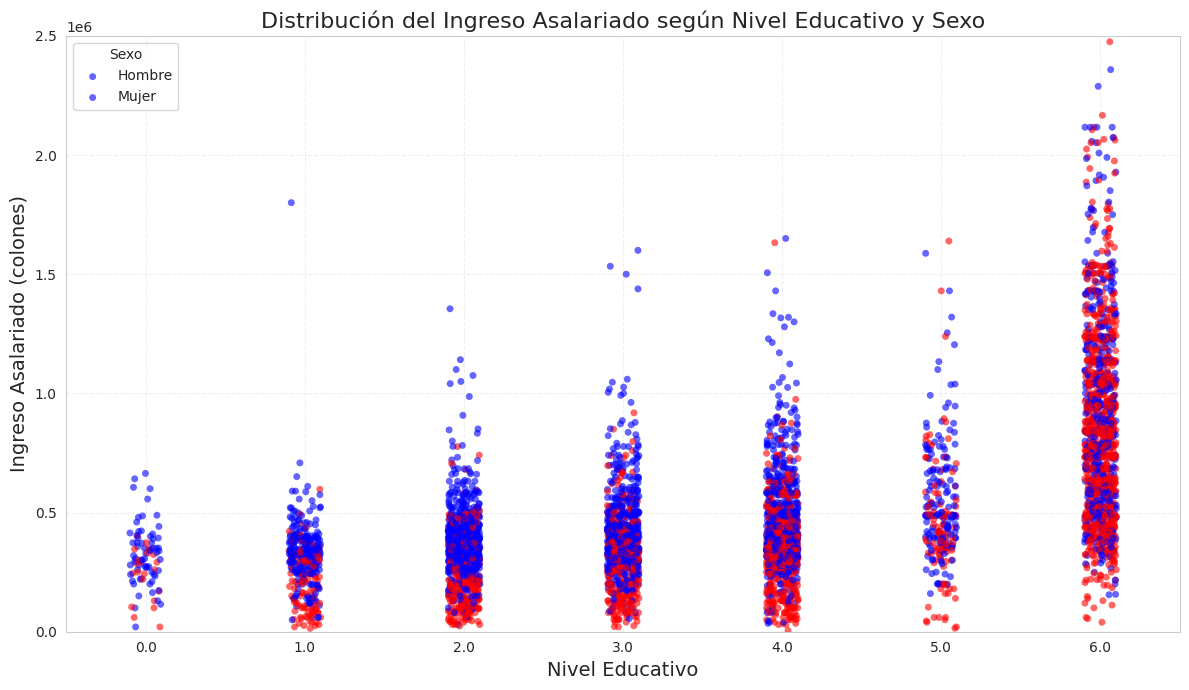

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Paleta de colores personalizada con Hombre=1 azul, Mujer=2 rosado
palette = {1: 'blue', 2: 'red'}

plt.figure(figsize=(12, 7))

sns.stripplot(
    data=df_filtrado,
    x="Nivel_educativo",
    y="Ingreso_asalariado",
    hue="Sexo",
    jitter=True,
    alpha=0.6,
    palette=palette
)

plt.ylim(0, 2500000)
plt.title("Distribución del Ingreso Asalariado según Nivel Educativo y Sexo", fontsize=16)
plt.xlabel("Nivel Educativo", fontsize=14)
plt.ylabel("Ingreso Asalariado (colones)", fontsize=14)
plt.legend(title="Sexo", labels=["Hombre", "Mujer"])
plt.grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()




Valor	Categoría
0	Ninguno
1	Primaria incompleta
2	Primaria completa
3	Secundaria incompleta
4	Secundaria completa
5	Universitario sin título
6	Universitario con título
9	No especificado

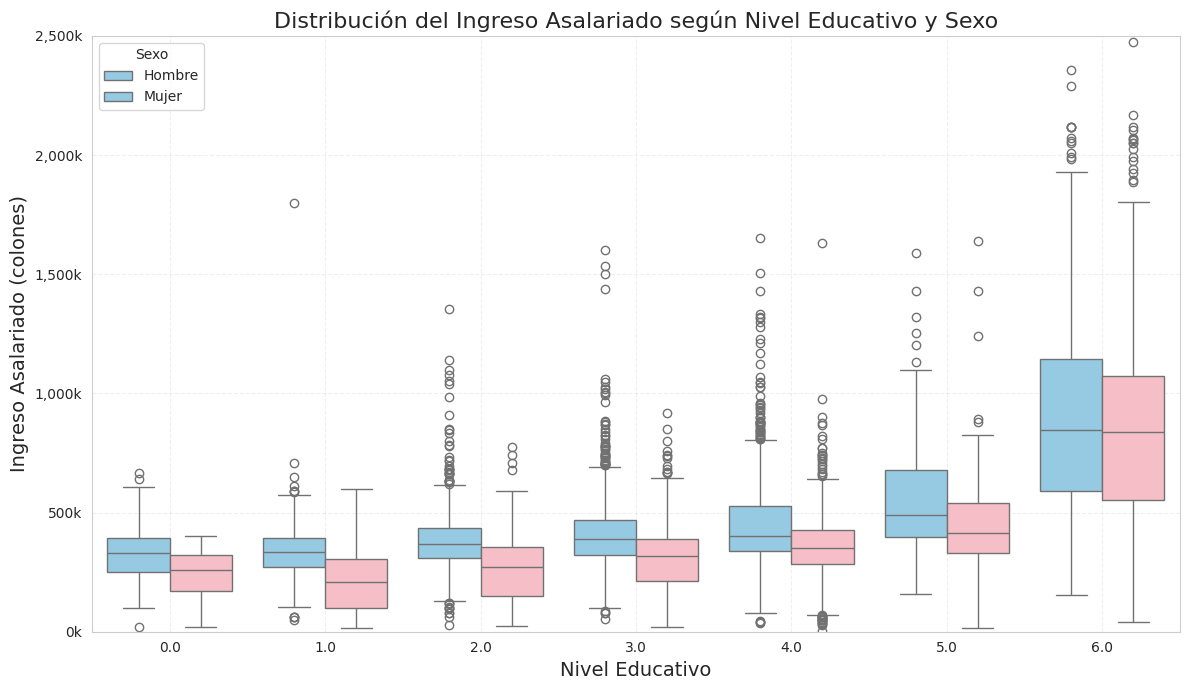

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Paleta de colores pastel personalizada: Hombre=1 azul claro, Mujer=2 rosado claro
palette = {1: '#89CFF0', 2: '#FFB6C1'}

plt.figure(figsize=(12, 7))

sns.boxplot(
    data=df_filtrado,
    x="Nivel_educativo",
    y="Ingreso_asalariado",
    hue="Sexo",
    palette=palette
)

# Formatear eje Y en miles
formatter = FuncFormatter(lambda x, _: f'{int(x/1000):,}k')
plt.gca().yaxis.set_major_formatter(formatter)

plt.ylim(0, 2500000)
plt.title("Distribución del Ingreso Asalariado según Nivel Educativo y Sexo", fontsize=16)
plt.xlabel("Nivel Educativo", fontsize=14)
plt.ylabel("Ingreso Asalariado (colones)", fontsize=14)
plt.legend(title="Sexo", labels=["Hombre", "Mujer"])
plt.grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()


Valor	Categoría
0	Ninguno
1	Primaria incompleta
2	Primaria completa
3	Secundaria incompleta
4	Secundaria completa
5	Universitario sin título
6	Universitario con título
9	No especificado

In [ ]:
# @title
import pandas as pd
from tabulate import tabulate

# Filtrar datos válidos
df_edu = df[
    (df["Ingreso_asalariado"] > 0) &
    (df["Nivel_educativo"].notna()) &
    (df["Sexo"].isin([1, 2]))
]

# Agrupar y resumir
tabla_resumen = df_edu.groupby(['Nivel_educativo', 'Sexo'])["Ingreso_asalariado"].agg(
    Total_personas="count",
    Promedio="mean",
    Mediana="median",
    Desviación="std",
    Mínimo="min",
    Máximo="max"
).reset_index()

# Reemplazar codificación de sexo
tabla_resumen["Sexo"] = tabla_resumen["Sexo"].replace({1: "Hombre", 2: "Mujer"})

# Función para formatear colones
def formatear_colones(x):
    return "₡{:,.0f}".format(x)

# Formatear columnas monetarias
for col in ["Promedio", "Mediana", "Desviación", "Mínimo", "Máximo"]:
    tabla_resumen[col] = tabla_resumen[col].apply(formatear_colones)

# Ordenar para presentación
tabla_resumen = tabla_resumen.sort_values(by=["Nivel_educativo", "Sexo"])

# Mostrar como tabla formateada
print(tabulate(tabla_resumen, headers="keys", tablefmt="fancy_grid", showindex=False))

╒═══════════════════╤════════╤══════════════════╤════════════╤═══════════╤══════════════╤══════════╤════════════╕
│   Nivel_educativo │ Sexo   │   Total_personas │ Promedio   │ Mediana   │ Desviación   │ Mínimo   │ Máximo     │
╞═══════════════════╪════════╪══════════════════╪════════════╪═══════════╪══════════════╪══════════╪════════════╡
│                 0 │ Hombre │               65 │ ₡329,042   │ ₡329,296  │ ₡127,700     │ ₡20,000  │ ₡664,167   │
├───────────────────┼────────┼──────────────────┼────────────┼───────────┼──────────────┼──────────┼────────────┤
│                 0 │ Mujer  │               21 │ ₡242,593   │ ₡260,000  │ ₡107,246     │ ₡20,000  │ ₡403,333   │
├───────────────────┼────────┼──────────────────┼────────────┼───────────┼──────────────┼──────────┼────────────┤
│                 1 │ Hombre │              248 │ ₡337,176   │ ₡336,028  │ ₡143,716     │ ₡50,000  │ ₡1,800,000 │
├───────────────────┼────────┼──────────────────┼────────────┼───────────┼──────────────

📌 Conclusión

✅ Sí, existe una brecha de género en los ingresos asalariados, especialmente en los niveles educativos más bajos.

📉 Esta brecha se reduce conforme aumenta el nivel educativo, lo que sugiere que la educación superior contribuye a cerrar la desigualdad salarial entre hombres y mujeres.